EXAMPLE: Using aweSOM to segment 4-dimensional multiclass classification data from the iris dataset (https://archive.ics.uci.edu/dataset/53/iris)

In [1]:
import sys
import os

# adding aweSOM to the system path
sys.path.append('../')
import som.parallel_som as psom

Use scikit-learn datasets module ot import the IRIS dataset

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

print("Shape of the data :", iris.data.shape)
print("Labeled classes :", iris.target_names)
print("Features in the set :", iris.feature_names)


Shape of the data : (150, 4)
Labeled classes : ['setosa' 'versicolor' 'virginica']
Features in the set : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Visualize the dataset in a few different ways

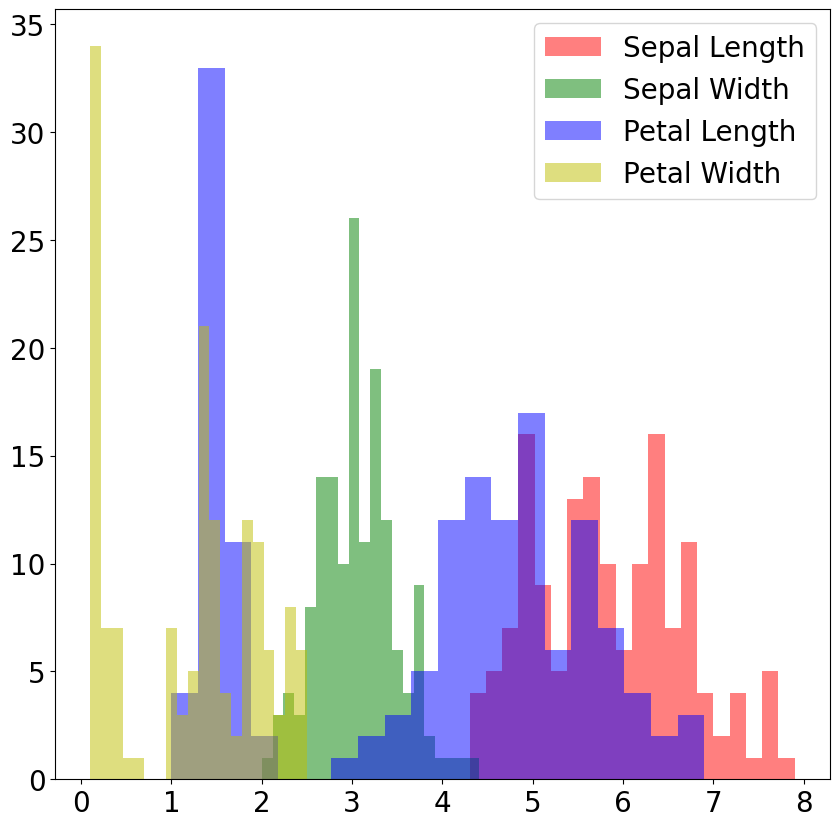

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# Histogram
plt.figure(figsize=(10, 10))
plt.hist(iris.data[:,0], bins=20, color='r', alpha=0.5, label='Sepal Length')
plt.hist(iris.data[:,1], bins=20, color='g', alpha=0.5, label='Sepal Width')
plt.hist(iris.data[:,2], bins=20, color='b', alpha=0.5, label='Petal Length')
plt.hist(iris.data[:,3], bins=20, color='y', alpha=0.5, label='Petal Width')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


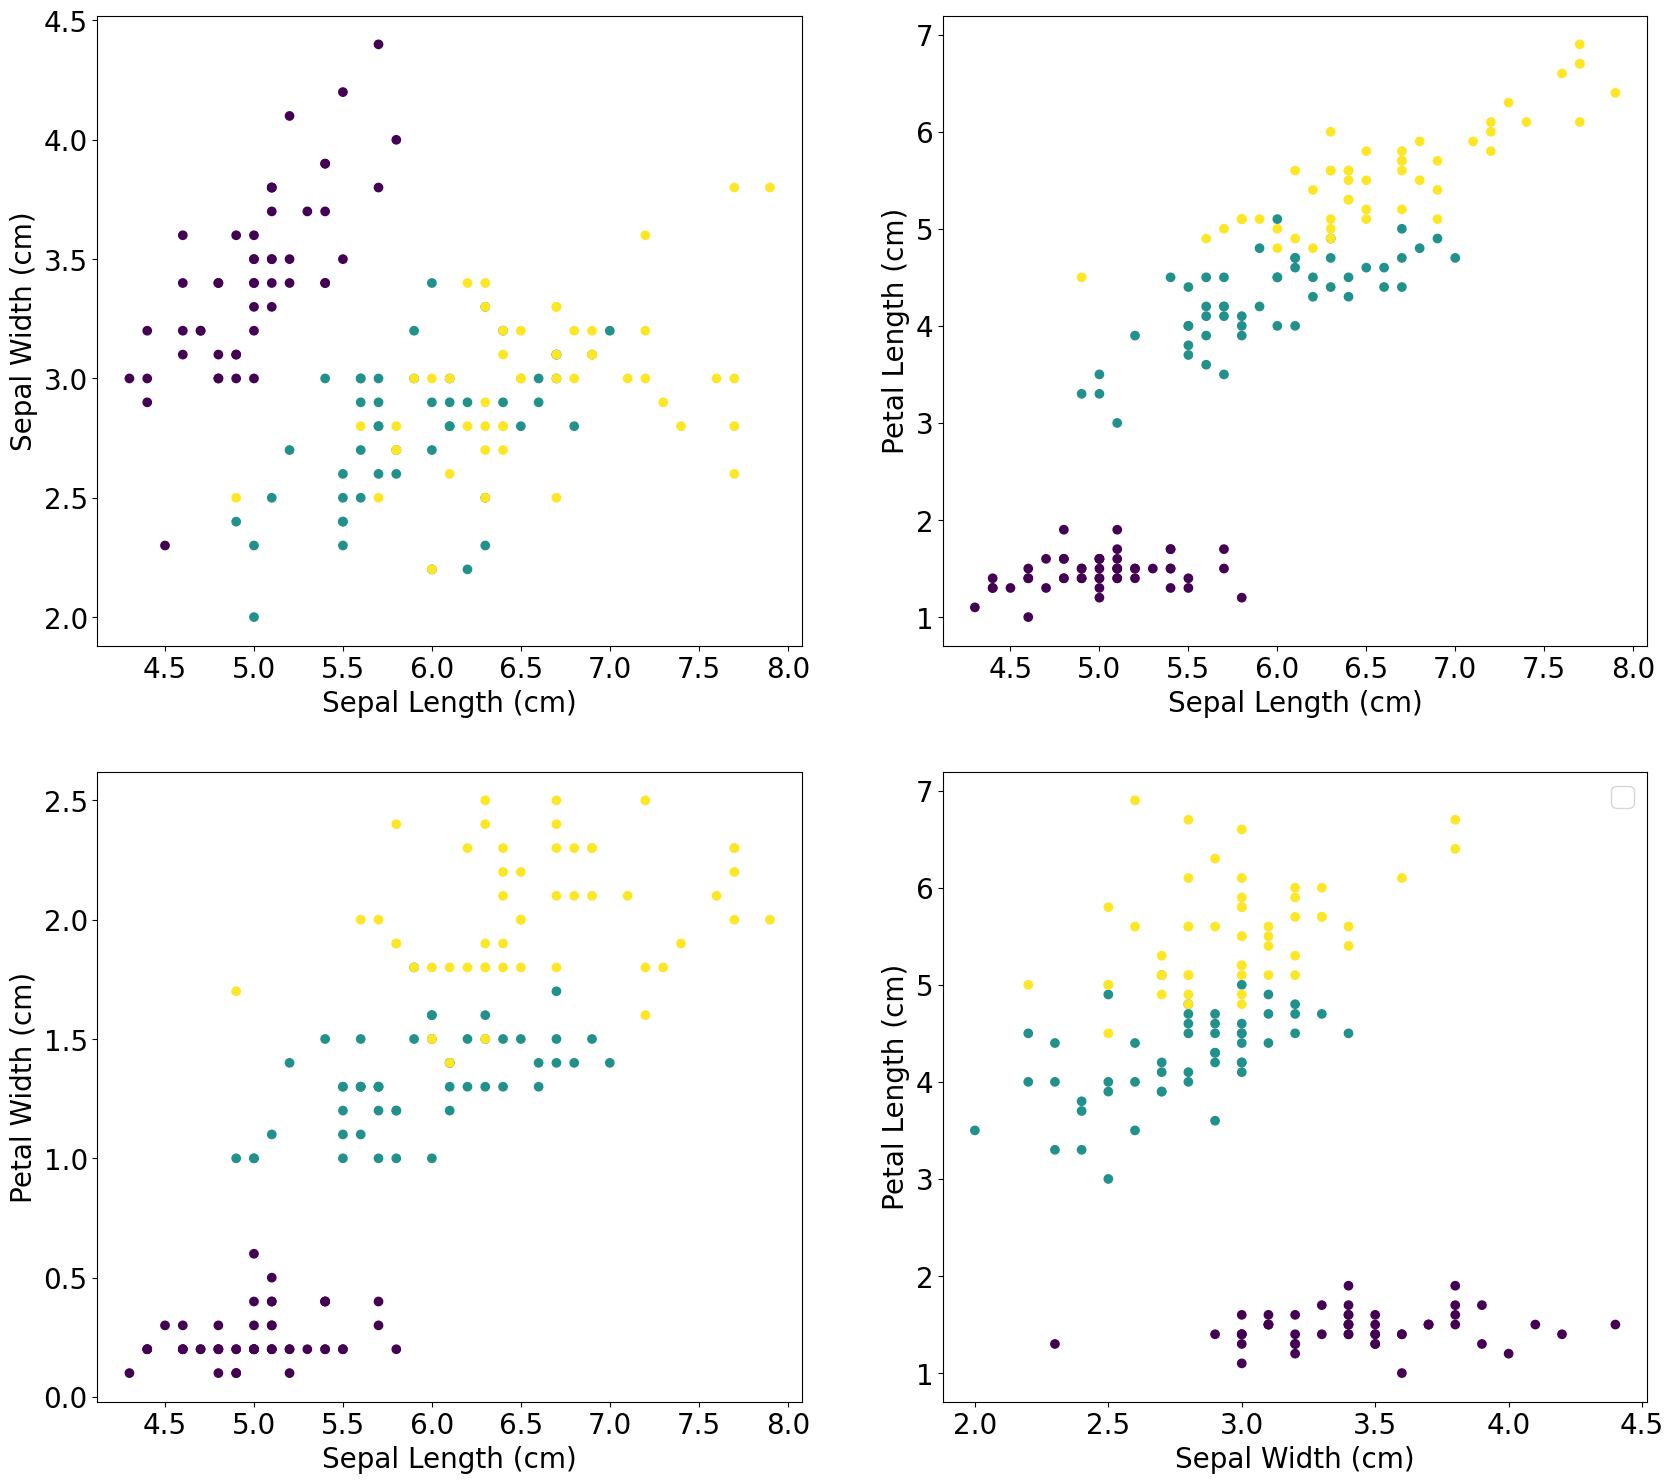

In [29]:
# Scatter plots
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
scatter = axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=iris.target, cmap='viridis')
axs[0,0].set_xlabel('Sepal Length (cm)')
axs[0,0].set_ylabel('Sepal Width (cm)')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='viridis')
axs[0,1].set_xlabel('Sepal Length (cm)')
axs[0,1].set_ylabel('Petal Length (cm)')
axs[1,0].scatter(iris.data[:,0], iris.data[:,3], c=iris.target, cmap='viridis')
axs[1,0].set_xlabel('Sepal Length (cm)')
axs[1,0].set_ylabel('Petal Width (cm)')
axs[1,1].scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap='viridis')
axs[1,1].set_xlabel('Sepal Width (cm)')
axs[1,1].set_ylabel('Petal Length (cm)')
# axs[0,1].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
axs.legend()

Pre-processing step : normalize data with either MinMaxScaler (shift the distribution to between 0 and 1) or StandardScaler (shift the mean to 0 and standard deviation of the sample to 1)

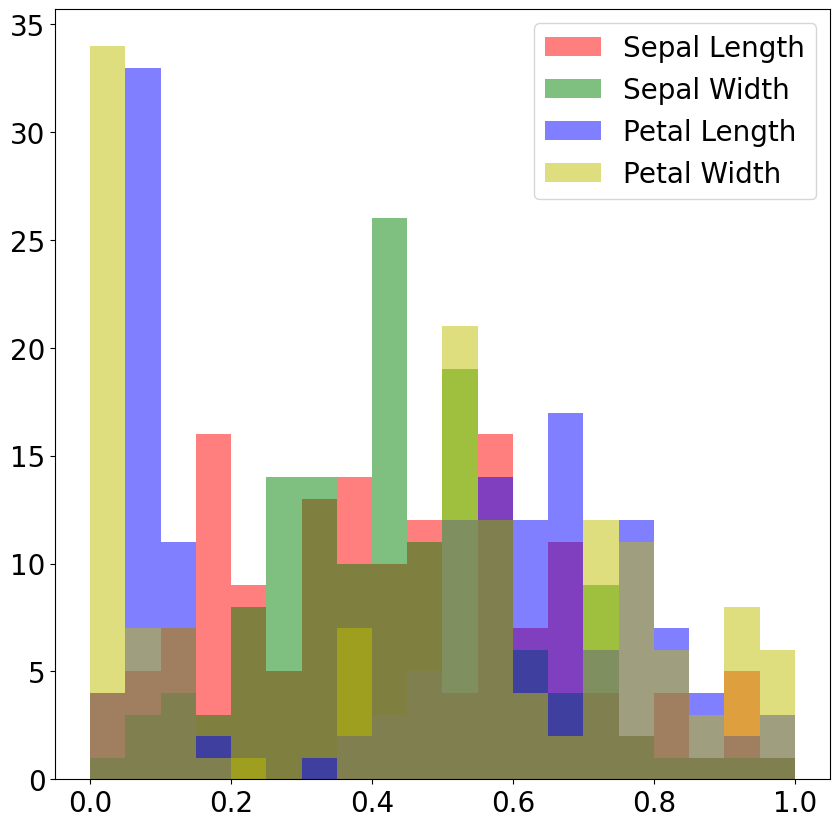

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()#StandardScaler() #
iris_data_transformed = scaler.fit_transform(iris.data)

plt.figure(figsize=(10, 10))
plt.hist(iris_data_transformed[:,0], bins=20, color='r', alpha=0.5, label='Sepal Length')
plt.hist(iris_data_transformed[:,1], bins=20, color='g', alpha=0.5, label='Sepal Width')
plt.hist(iris_data_transformed[:,2], bins=20, color='b', alpha=0.5, label='Petal Length')
plt.hist(iris_data_transformed[:,3], bins=20, color='y', alpha=0.5, label='Petal Width')
plt.legend()
plt.show()

Example 1: SOM run with xdim = ydim = 10, alpha = 0.5, training steps = 1000

Initialize the SOM map

In [7]:
import pandas as pd

attr=pd.DataFrame(iris_data_transformed)
attr.columns=iris.feature_names

xdim, ydim = 10, 10 # small map since there are only 150 samples
alpha = 0.5
train = 1000
lap = "iris"

print(f'constructing full SOM for xdim={xdim}, ydim={ydim}, alpha={alpha}, train={train}...', flush=True)
m=psom.map(xdim, ydim, alpha, train, alpha_type='decay', save_neurons=False)

constructing full SOM for xdim=10, ydim=10, alpha=0.5, train=1000...


Train the SOM network

In [8]:
# labels is just the order of the samples (from 0 to N-1)
labels = np.array(list(range(len(attr))))
m.fit(attr,labels)
neurons = m.all_neurons()
# print("neurons: ", neurons)
save_neuron_values = False
if save_neuron_values == True:
        np.save(f'neurons_{lap}_{xdim}{ydim}_{alpha}_{train}.npy', neurons, allow_pickle=True)
        print("Data being saved")
average_loss = m.average_loss
epoch = m.epoch
# np.save(f'evolution_{lap}_{xdim}{ydim}_{alpha}_{epoch}.npy', average_loss, allow_pickle=True)

Shrinking neighborhood size to 11 at epoch 0
Shrinking neighborhood size to 10 at epoch 16
Shrinking neighborhood size to 9 at epoch 32
Decaying learning rate to 0.375 at epoch 40
Shrinking neighborhood size to 8 at epoch 48
Decaying learning rate to 0.28125 at epoch 80
Decaying learning rate to 0.2109375 at epoch 120
Decaying learning rate to 0.158203125 at epoch 160
Decaying learning rate to 0.11865234375 at epoch 200
Decaying learning rate to 0.0889892578125 at epoch 240
Decaying learning rate to 0.066741943359375 at epoch 280
Decaying learning rate to 0.05005645751953125 at epoch 320
Decaying learning rate to 0.03754234313964844 at epoch 360
Decaying learning rate to 0.028156757354736328 at epoch 400
Decaying learning rate to 0.021117568016052246 at epoch 440
Decaying learning rate to 0.015838176012039185 at epoch 480
Decaying learning rate to 0.011878632009029388 at epoch 520
Decaying learning rate to 0.008908974006772041 at epoch 560
Decaying learning rate to 0.006681730505079031

Map each observation to the neurons and assign clusters

In [9]:
#Data matrix with neuron positions:
print("Calculating projection")
data_matrix=m.projection()
data_Xneuron=data_matrix[:,0]
data_Yneuron=data_matrix[:,1]
print("data matrix: ", flush=True)
print(data_matrix[:10,:], flush=True)
print("Printing Xneuron info", flush=True)
print("Shape of Xneuron: ", data_Xneuron.shape, flush=True)
print("Printing Yneuron info", flush=True)
print("Shape of Yneuron: ", data_Yneuron.shape, flush=True)

#Neuron matrix with centroids:
umat = m.compute_umat(smoothing=2)
centrs = m.compute_combined_clusters(umat, False, 0.15) #0.15
centr_x = centrs['centroid_x']
centr_y = centrs['centroid_y']

#create list of centroid _locations
neuron_x, neuron_y = np.shape(centr_x)

centr_locs = []
for i in range(neuron_x):
        for j in range(neuron_y):
                cx = centr_x[i,j]
                cy = centr_y[i,j]

                centr_locs.append((cx,cy))

unique_ids = list(set(centr_locs))
n_clusters = len(unique_ids)
print("Number of clusters", flush=True)
print(n_clusters)

mapping = {}
for I, key in enumerate(unique_ids):
        # print(key, I)
        mapping[key] = I

clusters = np.zeros((neuron_x,neuron_y))
for i in range(neuron_x):
        for j in range(neuron_y):
                key = (centr_x[i,j], centr_y[i,j])
                I = mapping[key]

                clusters[i,j] = I

print("clusters", flush=True)
print(clusters, flush=True)


#TRANSFER RESULT BACK INTO ORIGINAL DATA PLOT
# xinds = np.zeros(len(data_Xneuron))
# print("shape of xinds:", np.shape(xinds))
print("Assigning clusters", flush=True)

Calculating projection
data matrix: 
[[0. 0.]
 [0. 4.]
 [0. 3.]
 [0. 3.]
 [0. 0.]
 [0. 0.]
 [0. 2.]
 [0. 1.]
 [0. 4.]
 [0. 3.]]
Printing Xneuron info
Shape of Xneuron:  (150,)
Printing Yneuron info
Shape of Yneuron:  (150,)
shape of tmp:  (2, 1)
shape of tmp_1:  (48, 2)
Number of clusters
3
clusters
[[2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]
Assigning clusters


Numba function to assign cluster id without prior geometrical assumption

In [12]:
from numba import prange, njit

@njit(parallel=True)
def assign_cluster_id(data_Xneuron : np.ndarray, data_Yneuron : np.ndarray, clusters : np.ndarray) -> np.ndarray:
        """From neuron data and cluster assignments, return the cluster id of the observation (in a 1d array)

        Args:
            data_Xneuron (np.ndarray): 1d array with x coordinate of the neuron associated with a cell
            data_Yneuron (np.ndarray): 1d array with y coordinate of the neuron associated with a cell
            clusters (np.ndarray): n x n matrix of cluster on neuron map

        Returns:
            np.ndarray: cluster_id
        """
        cluster_id = np.zeros(len(data_Xneuron), dtype=np.int32)
        for i in prange(len(data_Xneuron)):
            cluster_id[i] = clusters[int(data_Xneuron[i]), int(data_Yneuron[i])]
        return cluster_id

Map cluster IDs back to each observation in the dataset

In [13]:
som_labels = assign_cluster_id(data_Xneuron, data_Yneuron, clusters)

Scatter plot of cluster ids from SOM

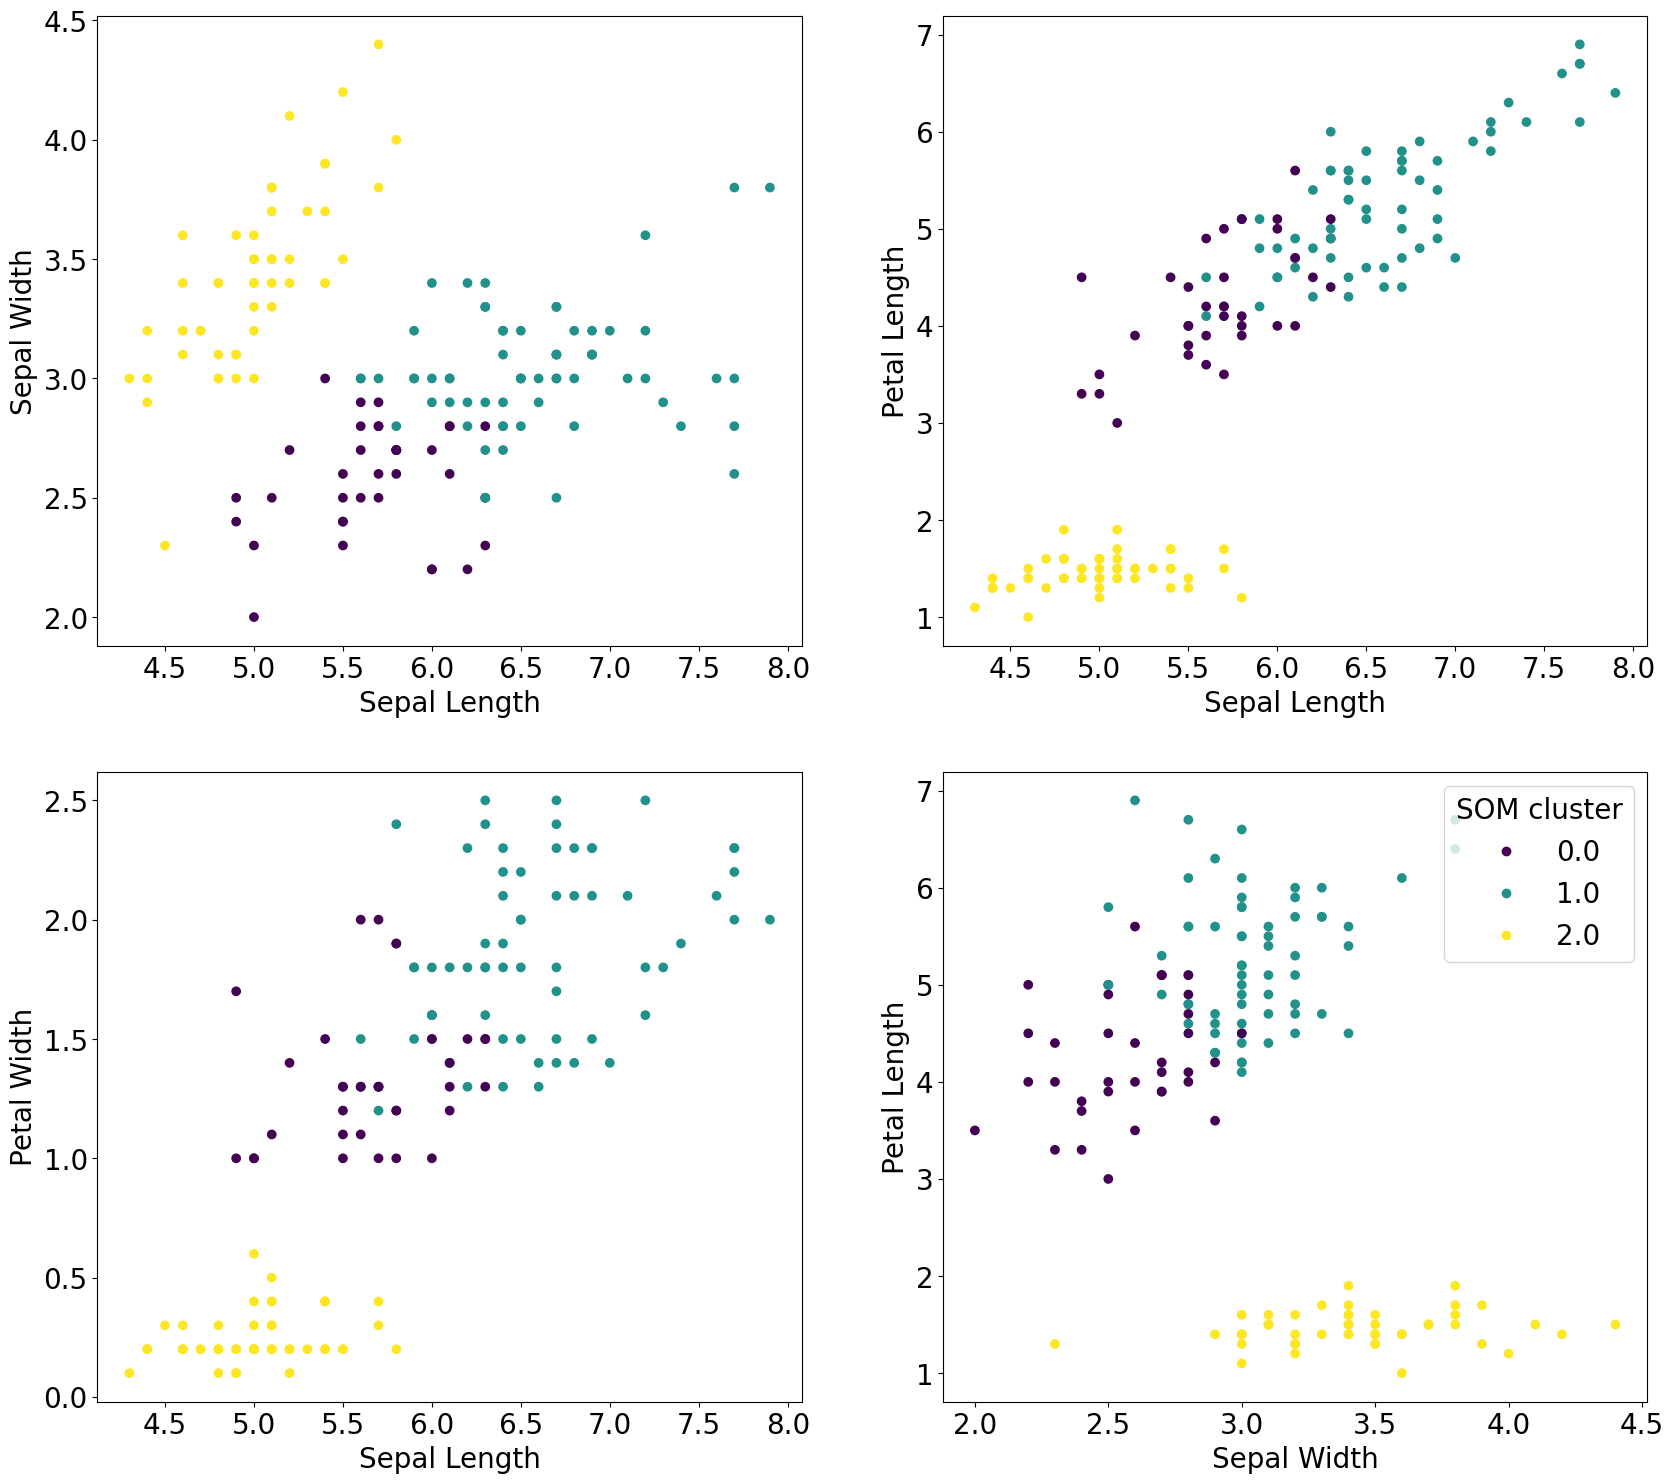

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
scatter = axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=som_labels, cmap='viridis')
axs[0,0].set_xlabel('Sepal Length')
axs[0,0].set_ylabel('Sepal Width')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=som_labels, cmap='viridis')
axs[0,1].set_xlabel('Sepal Length')
axs[0,1].set_ylabel('Petal Length')
axs[1,0].scatter(iris.data[:,0], iris.data[:,3], c=som_labels, cmap='viridis')
axs[1,0].set_xlabel('Sepal Length')
axs[1,0].set_ylabel('Petal Width')
axs[1,1].scatter(iris.data[:,1], iris.data[:,2], c=som_labels, cmap='viridis')
axs[1,1].set_xlabel('Sepal Width')
axs[1,1].set_ylabel('Petal Length')
axs[1,1].legend(scatter.legend_elements()[0], np.unique(clusters), loc="upper right", title="SOM cluster")

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We compare the real label to the inferred label

In [19]:
# Assign cluster number to label; change manually
label_map = {0: 1, 1: 2, 2: 0}#{0: "versicolor", 1: "virginica", 2: "setosa"}
correct_label = 0

for i in range(len(som_labels)):
    if label_map[som_labels[i]] == iris.target[i]:
        correct_label += 1

print("Number of correct predictions: ", correct_label)
print("Precision = ", correct_label/len(som_labels) * 100, "%")


Number of correct predictions:  120
Precision =  80.0 %


Run multiple SOMs and save the cluster id files

In [10]:
def TrainSOM(xdim : int, ydim : int, alpha : float, train : int, attr : pd.DataFrame, outdir : str, lap : str):
    print(f'constructing full SOM for xdim={xdim}, ydim={ydim}, alpha={alpha}, train={train}...', flush=True)
    m=psom.map(xdim, ydim, alpha, train, alpha_type='decay')
    
    labels = np.array(list(range(len(attr))))
    m.fit(attr,labels)

    FitSOM(m, outdir, xdim, ydim, alpha, lap)

    return None

def FitSOM(m, outdir : str, xdim : int, ydim : int, alpha : float, lap : str):
    #Data matrix with neuron positions:
    print("Calculating projection")
    data_matrix=m.projection()
    data_Xneuron=data_matrix[:,0]
    data_Yneuron=data_matrix[:,1]
    # print("data matrix: ", flush=True)
    # print(data_matrix[:10,:], flush=True)
    print("Printing Xneuron info", flush=True)
    print("Shape of Xneuron: ", data_Xneuron.shape, flush=True)
    print("Printing Yneuron info", flush=True)
    print("Shape of Yneuron: ", data_Yneuron.shape, flush=True)

    #Neuron matrix with centroids:
    umat = m.compute_umat(smoothing=2)
    centrs = m.compute_combined_clusters(umat, False, 0.15) #0.15
    centr_x = centrs['centroid_x']
    centr_y = centrs['centroid_y']

    #create list of centroid _locations
    neuron_x, neuron_y = np.shape(centr_x)

    centr_locs = []
    for i in range(neuron_x):
            for j in range(neuron_y):
                    cx = centr_x[i,j]
                    cy = centr_y[i,j]

                    centr_locs.append((cx,cy))

    unique_ids = list(set(centr_locs))
    n_clusters = len(unique_ids)
    print("Number of clusters", flush=True)
    print(n_clusters)

    mapping = {}
    for I, key in enumerate(unique_ids):
            # print(key, I)
            mapping[key] = I

    clusters = np.zeros((neuron_x,neuron_y))
    for i in range(neuron_x):
            for j in range(neuron_y):
                    key = (centr_x[i,j], centr_y[i,j])
                    I = mapping[key]

                    clusters[i,j] = I

    print("clusters", flush=True)
    print(clusters, flush=True)


    #TRANSFER RESULT BACK INTO ORIGINAL DATA PLOT
    # xinds = np.zeros(len(data_Xneuron))
    # print("shape of xinds:", np.shape(xinds))
    print("Assigning clusters", flush=True)
    som_labels = assign_cluster_id(data_Xneuron, data_Yneuron, clusters)

    np.save(f'{outdir}/clusters_{lap}_{xdim}{ydim}_{alpha}_{train}.npy', som_labels, allow_pickle=True)
    print("Done writing the cluster ID file")

    return None

In [146]:
outdir = '/mnt/home/tha10/jupyter-notebooks/som-out-iris'

dim = [10, 8, 12, 14, 16]
lr = [0.5, 0.25, 0.1, 0.05, 0.01]
steps = [1000, 500, 5000]
lap = "iris"

for xdim in dim:
    ydim = xdim
    for alpha in lr:
        for train in steps:
            try:
                TrainSOM(xdim=xdim, ydim=ydim, alpha=alpha, train=train, attr=attr, outdir=outdir, lap=lap)
            except:
                continue

constructing full SOM for xdim=10, ydim=10, alpha=0.5, train=1000...
Shrinking neighborhood size to 11 at epoch 0
Shrinking neighborhood size to 10 at epoch 16
Shrinking neighborhood size to 9 at epoch 32
Decaying learning rate to 0.375 at epoch 40
Shrinking neighborhood size to 8 at epoch 48
Decaying learning rate to 0.28125 at epoch 80
Decaying learning rate to 0.2109375 at epoch 120
Decaying learning rate to 0.158203125 at epoch 160
Decaying learning rate to 0.11865234375 at epoch 200
Decaying learning rate to 0.0889892578125 at epoch 240
Decaying learning rate to 0.066741943359375 at epoch 280
Decaying learning rate to 0.05005645751953125 at epoch 320
Decaying learning rate to 0.03754234313964844 at epoch 360
Decaying learning rate to 0.028156757354736328 at epoch 400
Decaying learning rate to 0.021117568016052246 at epoch 440
Decaying learning rate to 0.015838176012039185 at epoch 480
Decaying learning rate to 0.011878632009029388 at epoch 520
Decaying learning rate to 0.008908974

Now we test usability of the SCE framework

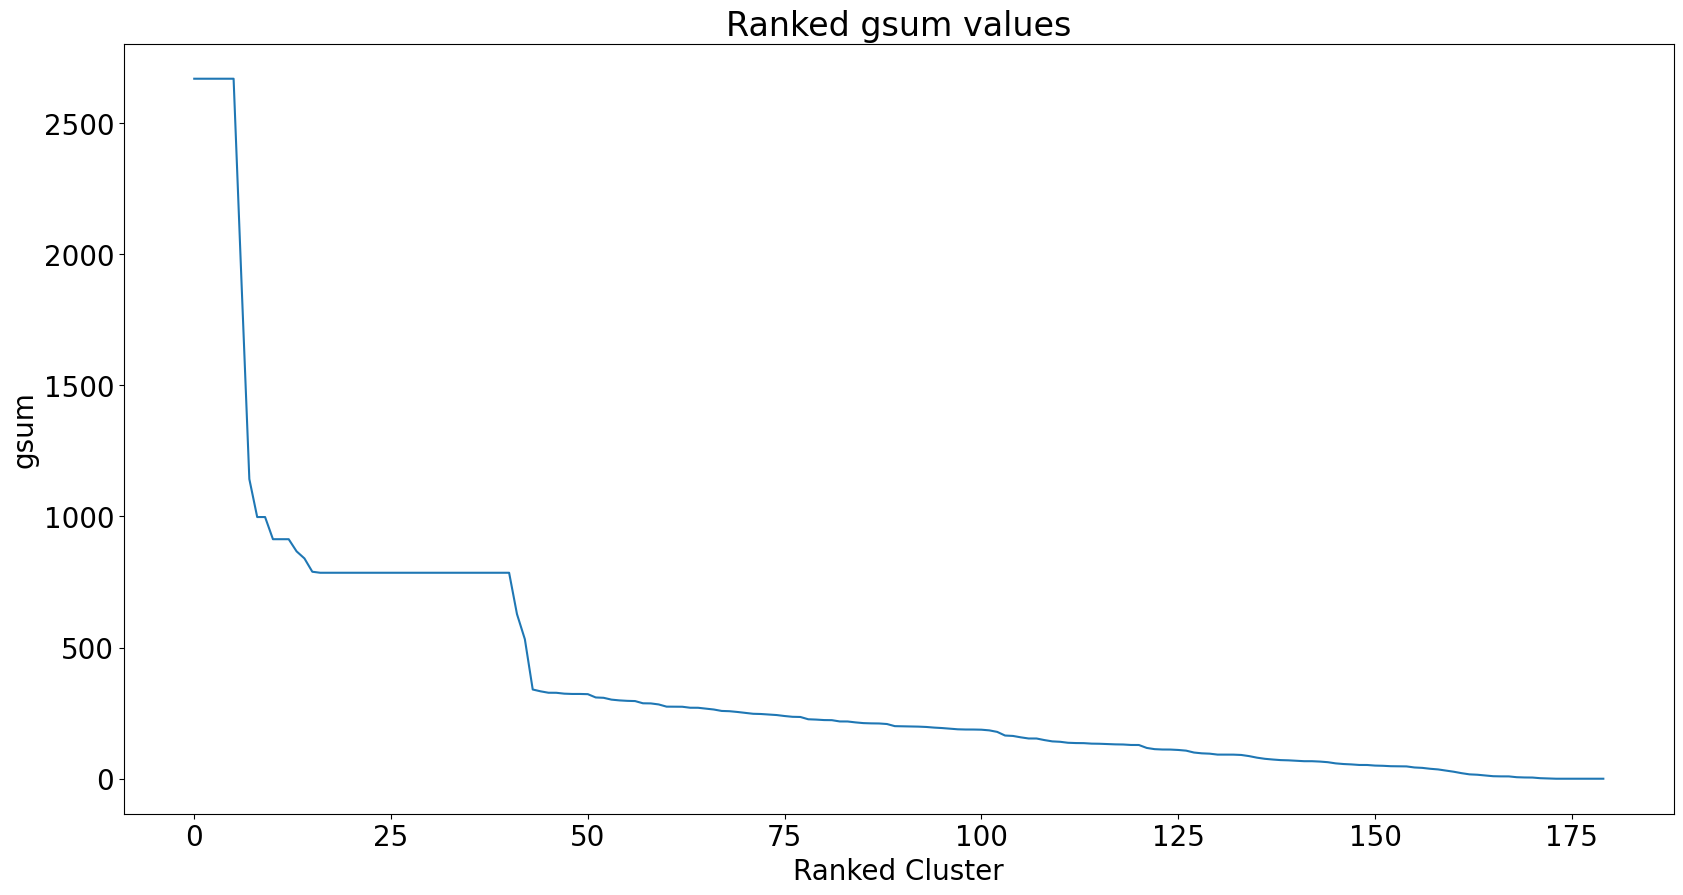

In [42]:
file_path = "/mnt/home/tha10/jupyter-notebooks/som-out-iris/SCE"

mapping = dict()
    
# read in the multimap mapping file and store in a dict that includes the file as key name, and the cluster_id and gsum as values
with open(file_path + "/multimap_mappings.txt", 'r') as f:
    for line in f:
        line = line.strip("\n")
        if not line[0].isnumeric():
            key_name = line.strip("clusters_").strip(".npy")
            mapping[key_name] = []
        else:
            mapping[key_name].append(line.split(" "))

map_list = []
for key in mapping.keys():
    map_list.extend([[float(i[1]), int(i[0]), key] for i in mapping[key]])
        
# sort the list based on gsum value
map_list.sort(key=lambda map_list: map_list[0], reverse=True)

# plot the gsum values
plt.figure(figsize=(20, 10))
plt.plot([i[0] for i in map_list])
plt.xlabel("Ranked Cluster")
plt.ylabel("gsum")
plt.title("Ranked gsum values")
plt.show()

Load the combined SCE clusters

In [17]:
sce_clusters = np.load(file_path + "/all_binary_maps.npy")

In [23]:
sce_clusters.shape

(5, 150)

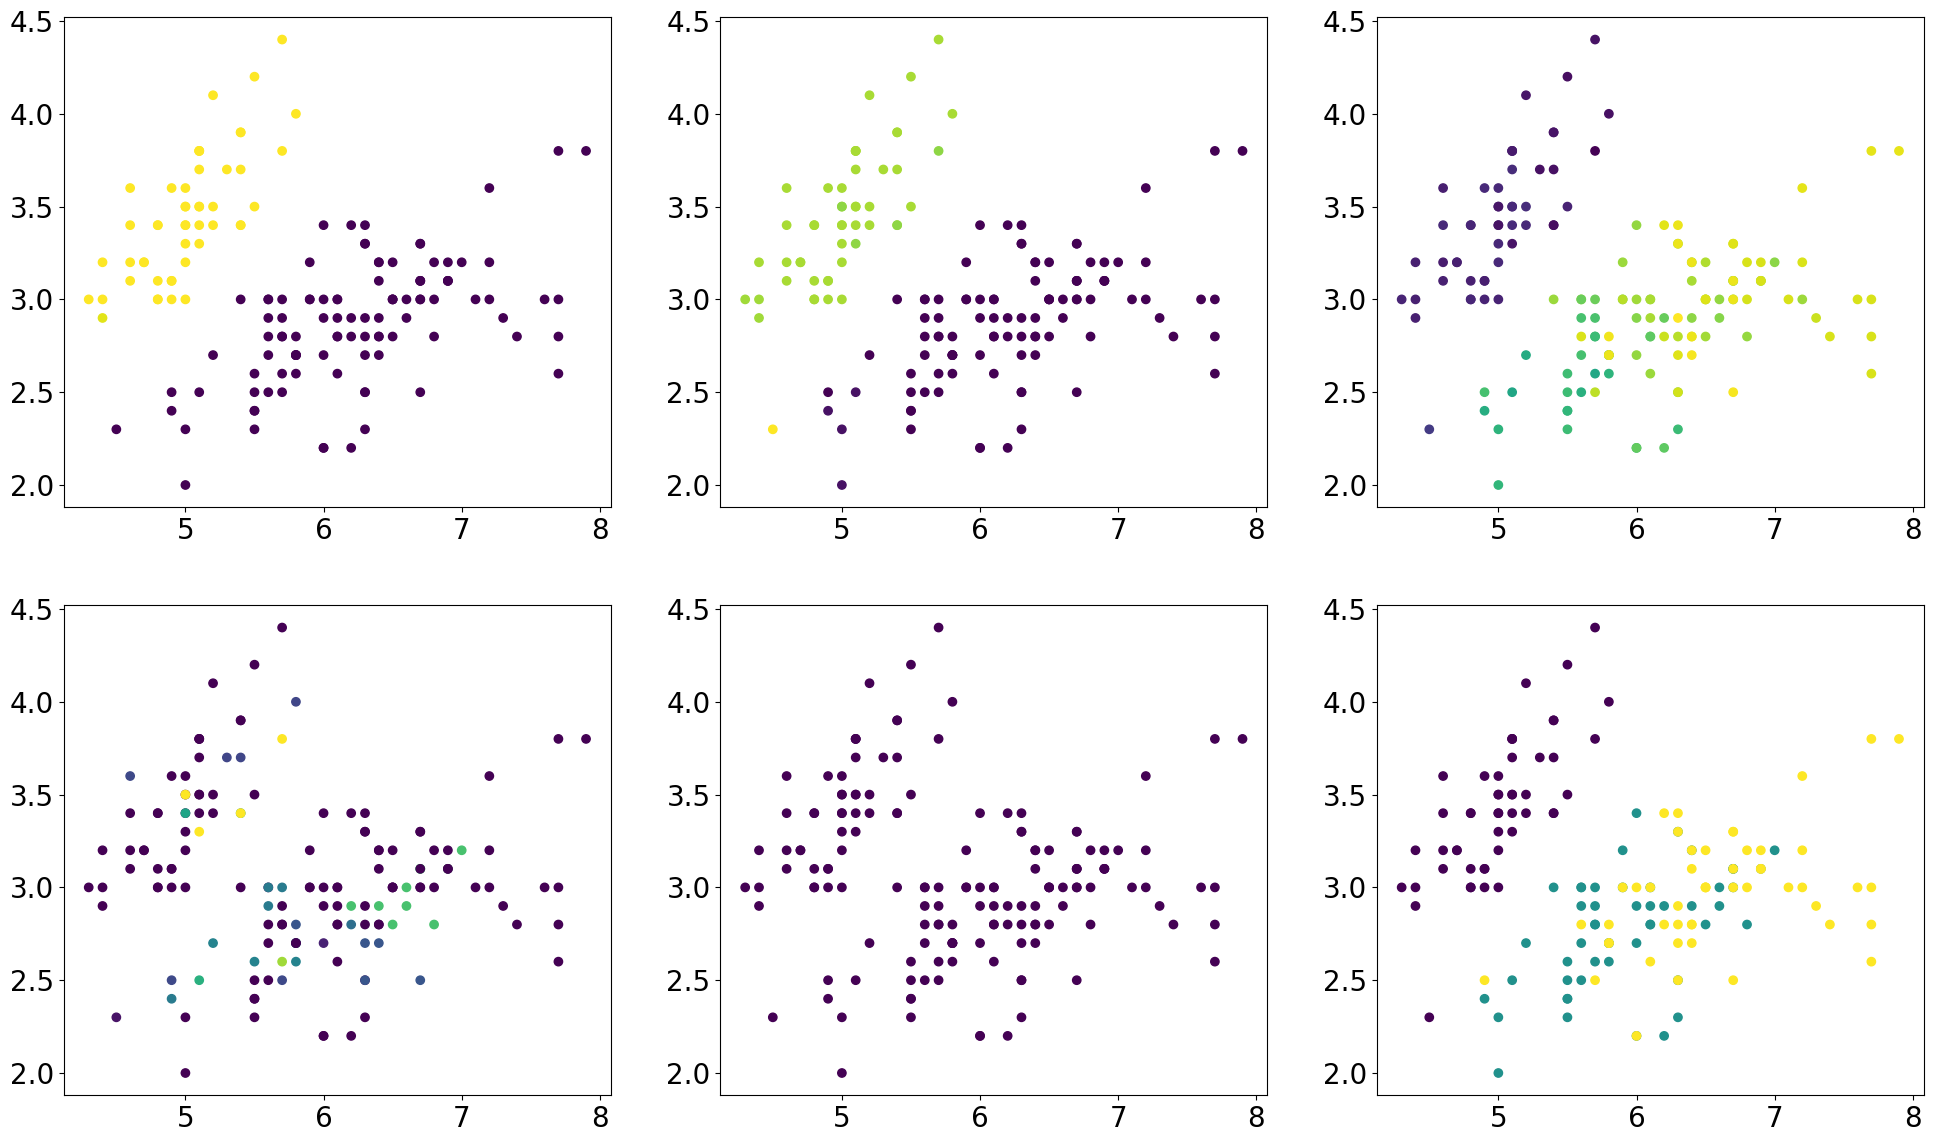

In [37]:
# plot the cluster maps
fig, axs = plt.subplots(2, 3, figsize=(24, 14))
axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[0], cmap='viridis')
axs[0,1].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[1], cmap='viridis')
axs[0,2].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[2], cmap='viridis')
axs[1,0].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[3], cmap='viridis')
axs[1,1].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[4], cmap='viridis')
axs[1,2].scatter(iris.data[:,0], iris.data[:,1], c=iris.target, cmap='viridis')

([<matplotlib.axis.XTick at 0x1554cdc1eec0>,
 [Text(0, 0, '0'),
  Text(5000, 0, '5000'),
  Text(10000, 0, '10000'),
  Text(15000, 0, '15000'),
  Text(20000, 0, '20000')])

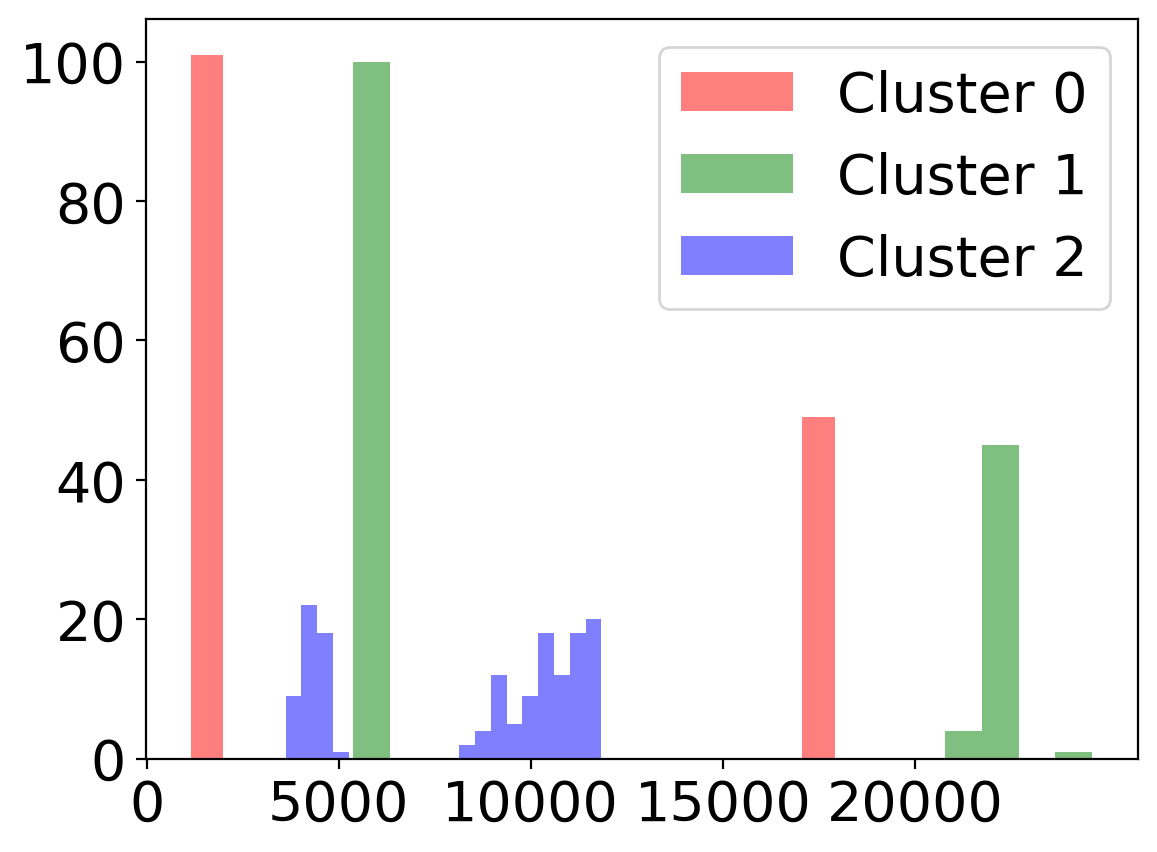

In [22]:
plt.figure(dpi=200)
plt.hist(sce_clusters[0], bins=20, color='r', alpha=0.5, label='Cluster 0')
plt.hist(sce_clusters[1], bins=20, color='g', alpha=0.5, label='Cluster 1')
plt.hist(sce_clusters[2], bins=20, color='b', alpha=0.5, label='Cluster 2')
# plt.hist(sce_clusters[3], bins=20, color='y', alpha=0.5, label='Cluster 3')
plt.legend()
plt.xticks([0, 5000, 10000, 15000, 20000])

Set a cutoff

In [23]:
signal_cutoff = 7500
cluster0 = np.where(sce_clusters[0] > signal_cutoff, sce_clusters[0], 0)
cluster1 = np.where(sce_clusters[1] > signal_cutoff, sce_clusters[1], 0)
cluster2 = np.where(sce_clusters[2] > signal_cutoff, sce_clusters[2], 0)

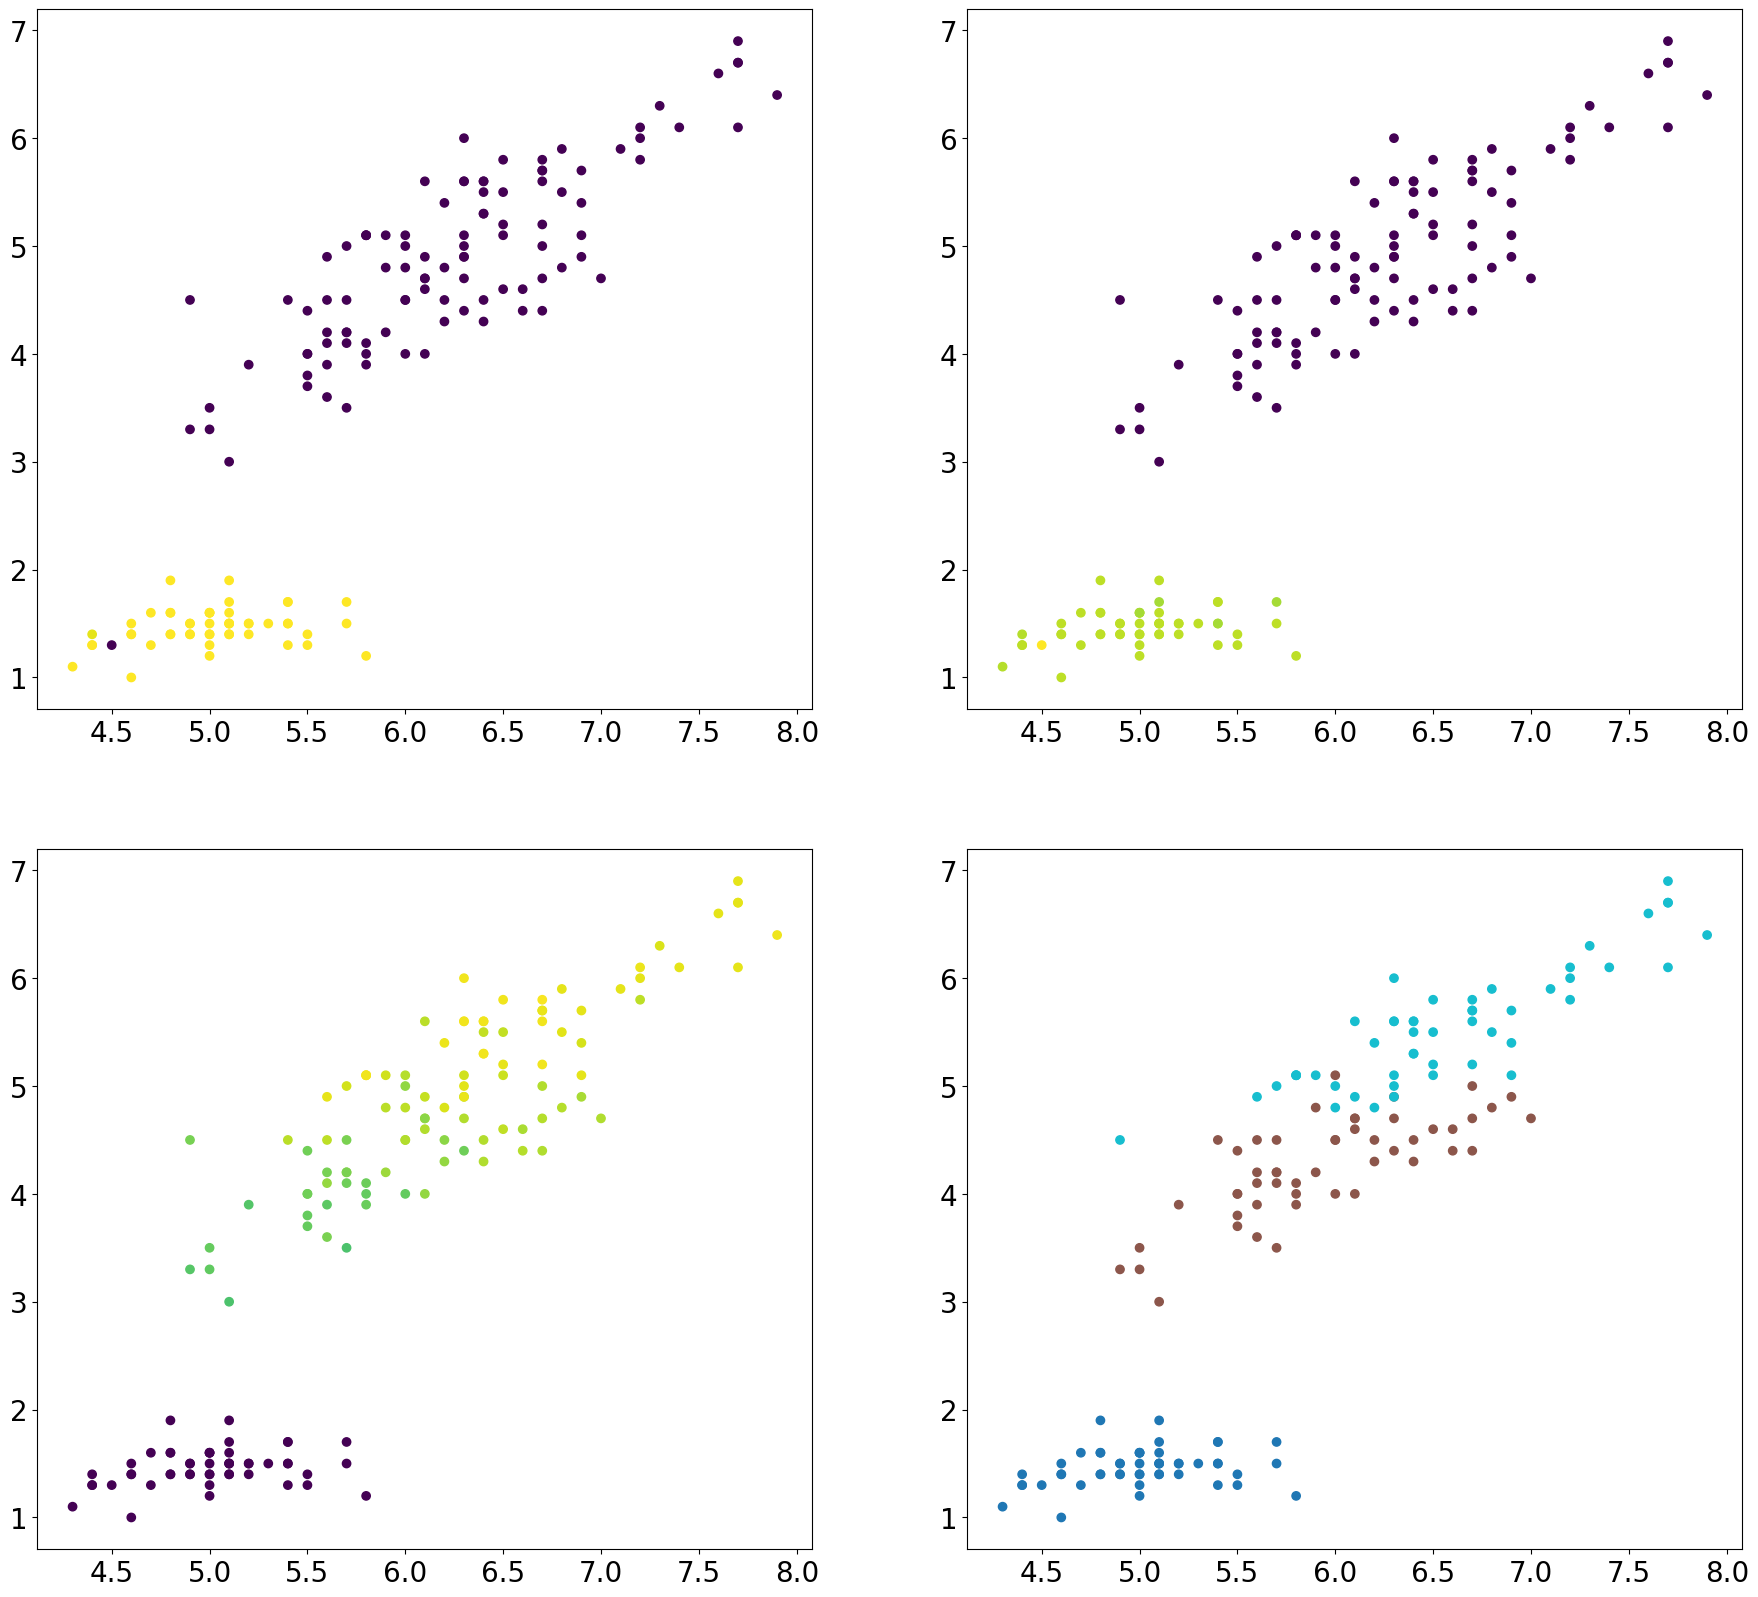

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(22, 20))
axs[0,0].scatter(iris.data[:,0], iris.data[:,2], c=cluster0, cmap='viridis')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=cluster1, cmap='viridis')
axs[1,0].scatter(iris.data[:,0], iris.data[:,2], c=cluster2, cmap='viridis')
axs[1,1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='tab10')

(array([50.,  0.,  0.,  0.,  0.,  0.,  0., 22., 29., 49.]),
 array([    0.        ,  1183.49194336,  2366.98388672,  3550.47558594,
         4733.96777344,  5917.45947266,  7100.95117188,  8284.44335938,
         9467.93554688, 10651.42675781, 11834.91894531]),
 <BarContainer object of 10 artists>)

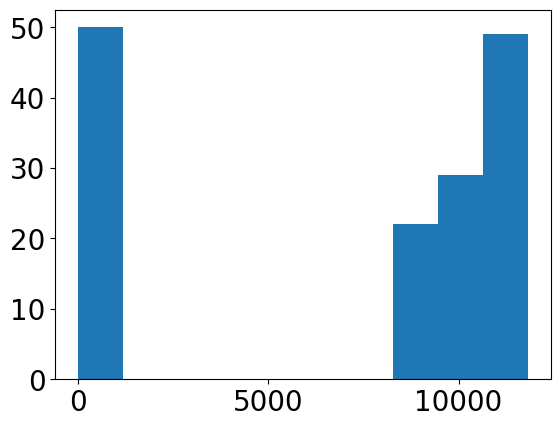

In [43]:
plt.hist(cluster2)

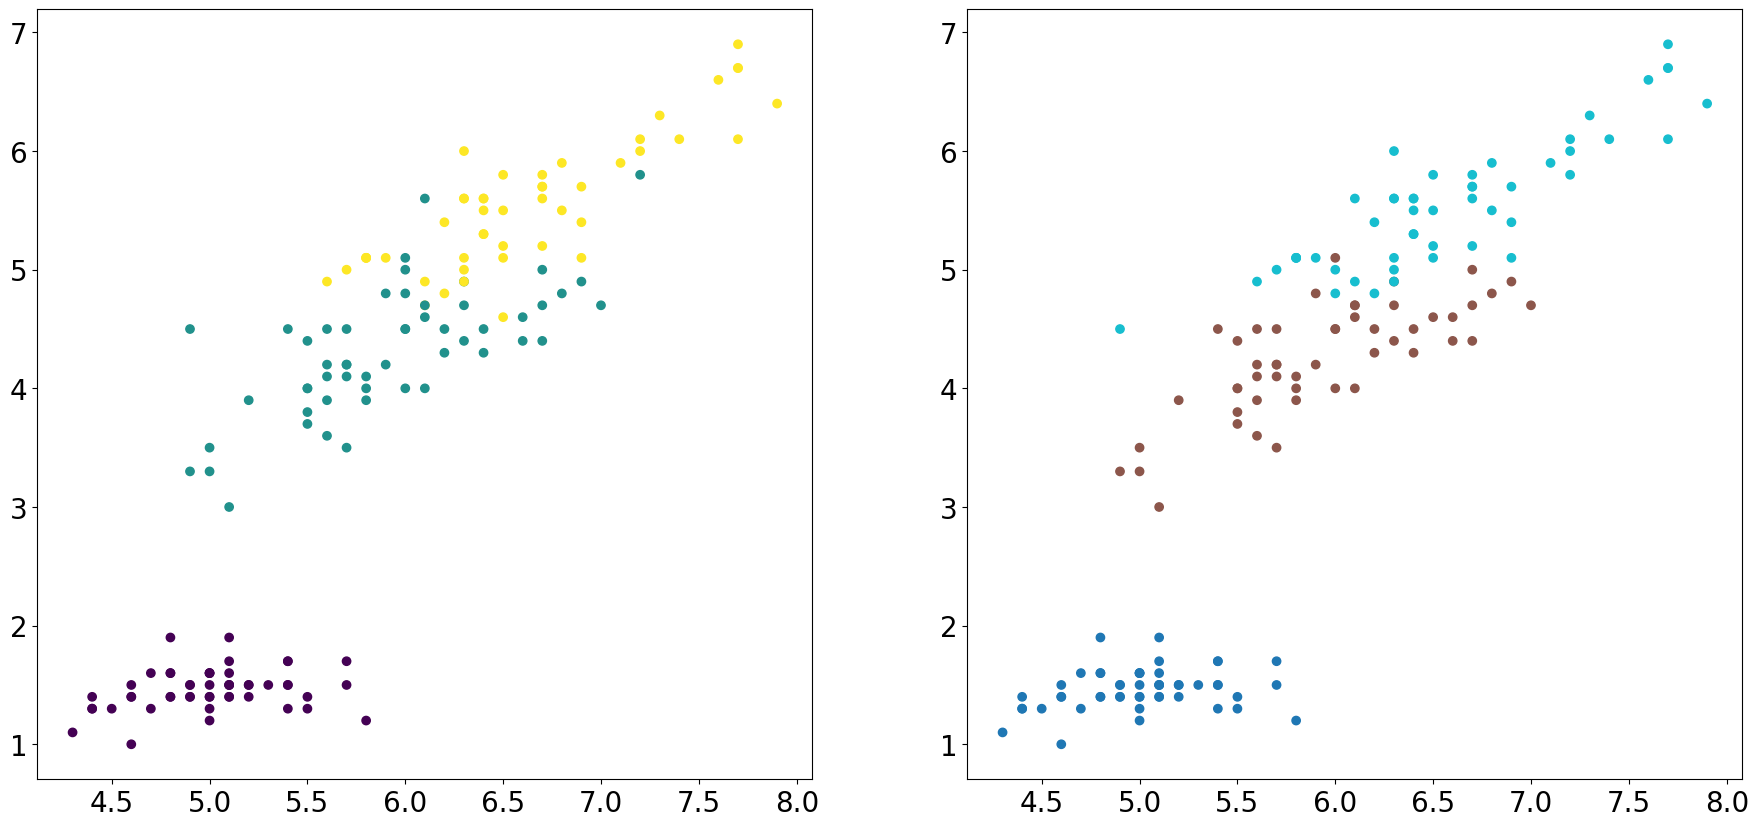

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
axs[0].scatter(iris.data[:,0], iris.data[:,2], c=[(2 if cluster2[i] > 10700 else(1 if cluster2[i] > 0 else 0)) for i in range(len(cluster2))], cmap='viridis')
axs[1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='tab10')

In [27]:
sum_all_clusters = np.sum(sce_clusters, axis=0)

(array([29., 54., 17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 47.]),
 array([15022.81445312, 16505.43945312, 17988.06445312, 19470.68945312,
        20953.3125    , 22435.9375    , 23918.5625    , 25401.1875    ,
        26883.8125    , 28366.4375    , 29849.0625    , 31331.68554688,
        32814.3125    , 34296.9375    , 35779.55859375, 37262.18359375,
        38744.80859375, 40227.43359375, 41710.05859375, 43192.68359375,
        44675.30859375]),
 <BarContainer object of 20 artists>)

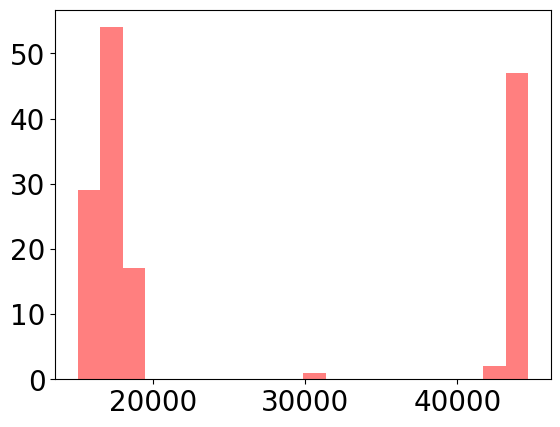

In [35]:
plt.hist(sum_all_clusters, bins=20, color='r', alpha=0.5, label='All Clusters')

In [1]:
plt.figure(dpi=300)
plt.scatter(iris.data[:,0], iris.data[:,2], c=np.log10(np.clip(sum_all_clusters, 15000, 18500)), cmap='viridis')
# np.clip(sum_all_clusters, 15000, 18500)
plt.colorbar()

NameError: name 'plt' is not defined